In [1]:
import pandas as pd
import numpy as np

In [8]:
result_df_ecfp = pd.read_csv('/home/liujin/Drugsafety/toxic_case_analysis/picture_draw/result_df_ecfp.csv')
result_df_offtarget = pd.read_csv('/home/liujin/Drugsafety/toxic_case_analysis/picture_draw/result_df_offtarget.csv')
result_df_offtarget.head()

,accuracy_score,roc_auc_score,f1_score,balanced_accuracy_score,matthews_corrcoef
0,0.827014,0.910751,0.775385,0.825136,0.637658
1,0.824645,0.900065,0.768750,0.819127,0.628995
2,0.831754,0.920224,0.776025,0.824724,0.642138
3,0.817536,0.917462,0.765957,0.817673,0.620827
4,0.819905,0.909345,0.761006,0.812633,0.617534


In [9]:
ecfp_acc_list = result_df_ecfp['accuracy_score'].tolist()
ecfp_auc_list = result_df_ecfp['roc_auc_score'].tolist()
ecfp_f1_list = result_df_ecfp['f1_score'].tolist()
ecfp_bacc_list = result_df_ecfp['balanced_accuracy_score'].tolist()
ecfp_mcc_list = result_df_ecfp['matthews_corrcoef'].tolist()

offtarget_acc_list = result_df_offtarget['accuracy_score'].tolist()
offtarget_auc_list = result_df_offtarget['roc_auc_score'].tolist()
offtarget_f1_list = result_df_offtarget['f1_score'].tolist()
offtarget_bacc_list = result_df_offtarget['balanced_accuracy_score'].tolist()
offtarget_mcc_list = result_df_offtarget['matthews_corrcoef'].tolist()


In [10]:
draw_df = pd.DataFrame({'value':offtarget_acc_list+offtarget_auc_list+ offtarget_f1_list+offtarget_bacc_list+offtarget_mcc_list+
                                 ecfp_acc_list+ecfp_auc_list+ecfp_f1_list+ecfp_bacc_list+ecfp_mcc_list,
                        'metric':['ACC']*5+['AUROC']*5+['F1']*5+['BACC']*5+['MCC']*5+
                                ['ACC']*5+['AUROC']*5+['F1']*5+['BACC']*5+['MCC']*5,
                        'model':['LightGBM']*25+['ECFP_LightGBM']*25})
draw_df.shape

(50, 3)

In [11]:
draw_df.head()

,value,metric,model
0,0.827014,ACC,LightGBM
1,0.824645,ACC,LightGBM
2,0.831754,ACC,LightGBM
3,0.817536,ACC,LightGBM
4,0.819905,ACC,LightGBM


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

AUROC_LightGBM vs. AUROC_ECFP_LightGBM: Mann-Whitney-Wilcoxon test two-sided, P_val:7.937e-03 U_stat=2.500e+01
ACC_LightGBM vs. ACC_ECFP_LightGBM: Mann-Whitney-Wilcoxon test two-sided, P_val:7.937e-03 U_stat=2.500e+01
F1_LightGBM vs. F1_ECFP_LightGBM: Mann-Whitney-Wilcoxon test two-sided, P_val:7.937e-03 U_stat=2.500e+01
BACC_LightGBM vs. BACC_ECFP_LightGBM: Mann-Whitney-Wilcoxon test two-sided, P_val:7.937e-03 U_stat=2.500e+01
MCC_LightGBM vs. MCC_ECFP_LightGBM: Mann-Whitney-Wilcoxon test two-sided, P_val:7.937e-03 U_stat=2.500e+01


(array([0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 [Text(0, 0.2, '0.2'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.2, '1.2')])

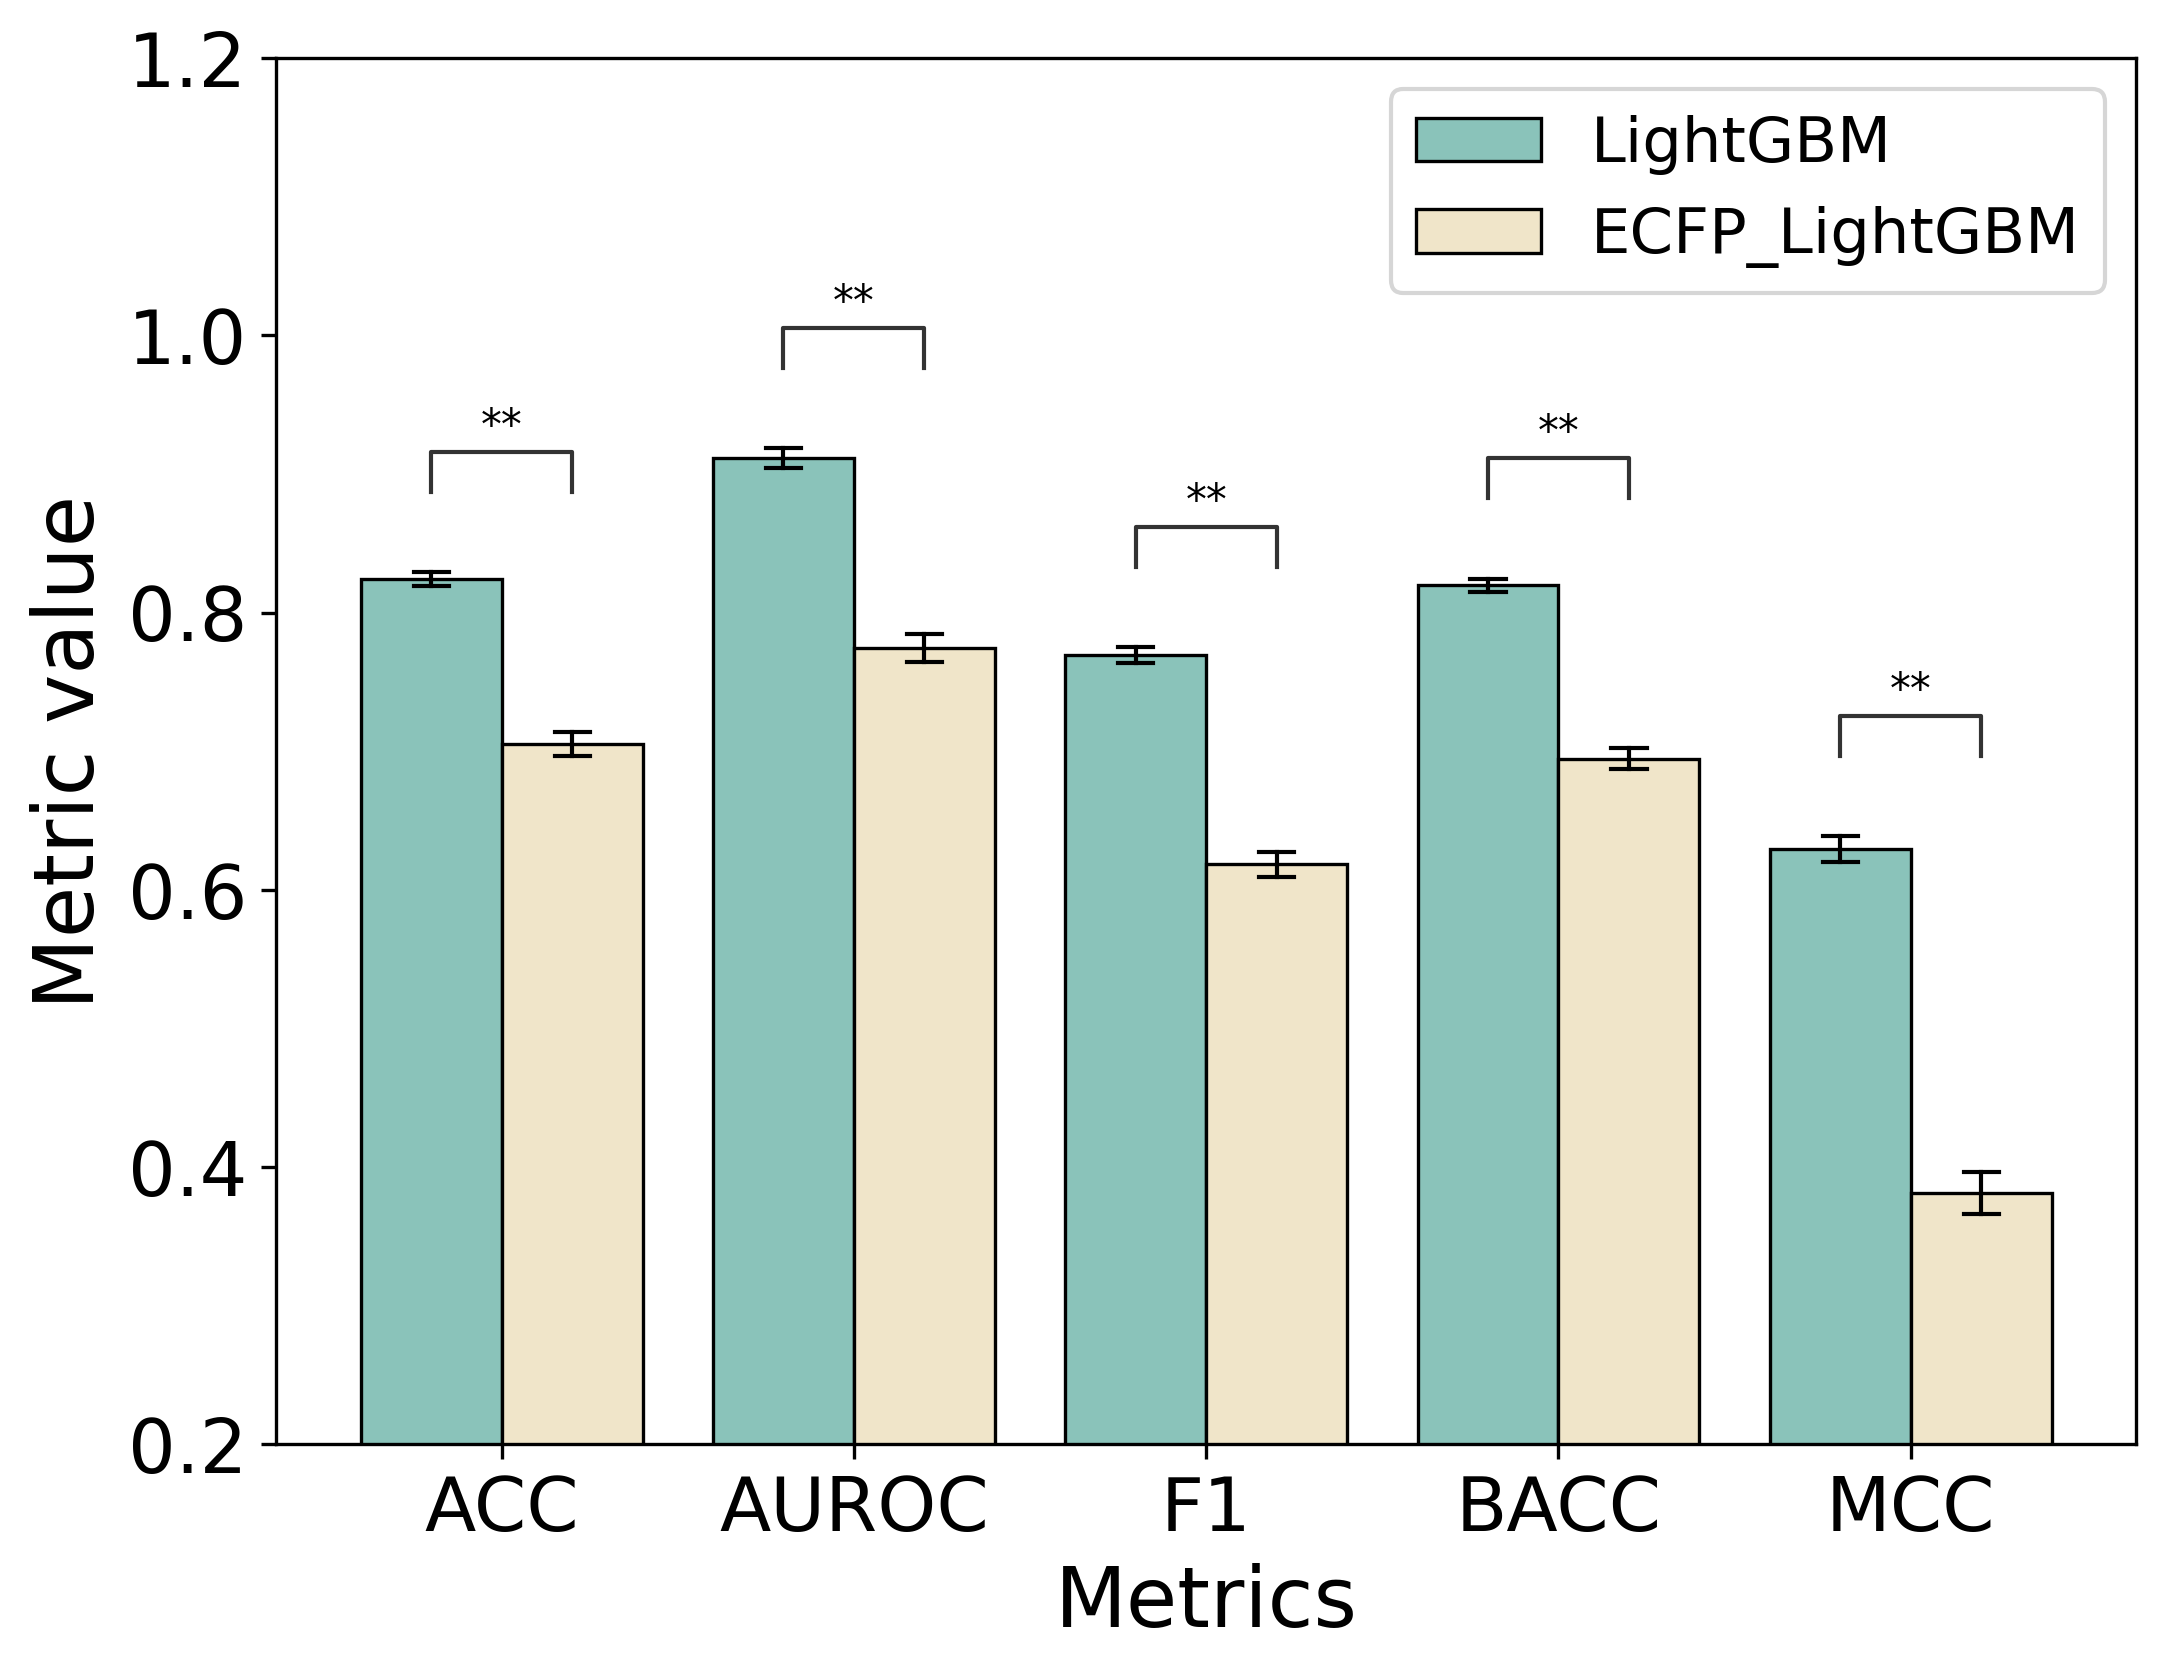

In [22]:
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from statannotations.Annotator import Annotator 

palette=['#80cdc1','#f6e8c3']

fig,ax = plt.subplots(figsize=(8,6),dpi=300,facecolor="w") 
ax = sns.barplot(x="metric", y="value", hue="model", data=draw_df, palette=palette, ci="sd",
                 capsize=.1,errwidth=1,errcolor="k",ax=ax,
                 **{"edgecolor":"k","linewidth":0.8}) 

# Add p-value
box_pairs = [(("ACC","LightGBM"),("ACC","ECFP_LightGBM")),
             (("AUROC","LightGBM"),("AUROC","ECFP_LightGBM")),
             (("F1","LightGBM"),("F1","ECFP_LightGBM")),
             (("BACC","LightGBM"),("BACC","ECFP_LightGBM")),
             (("MCC","LightGBM"),("MCC","ECFP_LightGBM"))]

annotator =  Annotator(ax, data=draw_df, x="metric", y="value", hue="model",
                      pairs=box_pairs)
annotator.configure(test='Mann-Whitney', text_format='star',line_height=0.03,line_width=1)
# test：'t-test_ind','t-test_welch','t-test_paired','Mann-Whitney','Mann-Whitney-gt','Mann-Whitney-ls'
annotator.apply_and_annotate()
plt.ylim(0.2,1.2) 
plt.xlabel('Metrics',fontsize=20)
plt.ylabel('Metric value',fontsize=20)
plt.legend(loc='upper right',prop = {'size': 15})
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)